# Artificial Neural Networks and Deep Learning---## Homework 1: Minimal Working ExampleTo make your first submission, follow these steps:1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.2. Upload the `training_set.npz` file to this folder.3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.4. Load and process the data.5. Implement and train your model.6. Submit the generated `.zip` file to Codabench.

## 🌐 Connect Colab to Google Drive

In [ ]:
!pip install tensorflow==2.17.0 keras==3.4.1 tensorflow-decision-forests==1.10.0 tensorflow-text==2.17.0 tf-keras==2.17.0 google keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


## ⚙️ Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import keras_cv

import numpy as np
import tensorflow as tf
import keras_cv
from tensorflow import keras as tfk
from tensorflow.keras import layers, models, applications
from tensorflow.keras.callbacks import LambdaCallback
import random
import keras
from keras.saving import register_keras_serializable

np.random.seed(42)
tf.random.set_seed(42);

## ⏳ Load the Data

In [ ]:
# Carica il dataset
data = np.load('training_set.npz')
X_train = data['images']
y_train = data['labels']

# Converti y in one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
#y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=8)

In [ ]:
import hashlib

# Get the hash of a certain image
def image_hash(image):
  image_bytes = image.tobytes()
  return hashlib.sha256(image_bytes).hexdigest()

# Remove all duplicates
unique_images = []
unique_labels = []
duplicate_positions = set()

seen_hashes = {}

for i in range(len(X_train)):
  img_hash = image_hash(X_train[i])
  if img_hash not in seen_hashes:
    if i not in duplicate_positions:
      unique_images.append(X_train[i])
      unique_labels.append(y_train[i])
    seen_hashes[img_hash] = i
  else:
    duplicate_positions.add(seen_hashes[img_hash])
    duplicate_positions.add(i)

X_train = [X_train[i] for i in range(len(X_train)) if i not in duplicate_positions]
y_train = [y_train[i] for i in range(len(y_train)) if i not in duplicate_positions]

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
# Split "train" set into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

array([[[204, 164, 164],
        [204, 164, 164],
        [204, 164, 164],
        ...,
        [218, 180, 172],
        [217, 179, 171],
        [219, 181, 173]],

       [[206, 166, 166],
        [206, 166, 166],
        [206, 166, 166],
        ...,
        [219, 178, 173],
        [217, 176, 171],
        [219, 178, 173]],

       [[205, 166, 165],
        [206, 166, 166],
        [206, 166, 166],
        ...,
        [221, 177, 174],
        [219, 176, 172],
        [218, 174, 171]],

       ...,

       [[210, 176, 167],
        [211, 177, 168],
        [210, 177, 168],
        ...,
        [220, 184, 177],
        [221, 185, 178],
        [221, 186, 178]],

       [[209, 175, 166],
        [211, 177, 168],
        [211, 177, 168],
        ...,
        [225, 191, 181],
        [226, 192, 182],
        [226, 192, 183]],

       [[210, 173, 165],
        [213, 176, 167],
        [214, 177, 168],
        ...,
        [226, 194, 180],
        [226, 194, 183],
        [226, 193, 184]]], dtype=uint8)
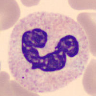

In [ ]:
X_test[0]

In [ ]:
# Function to get a set of layers for augmentation
def augment(images, labels):
  augmenter = keras_cv.layers.Augmenter(
    layers = [
      keras_cv.layers.RandomFlip(
          mode="horizontal_and_vertical"
      ),
      keras_cv.layers.RandomRotation(
          factor=0.2,
          fill_mode='nearest'
      ),
      keras_cv.layers.MixUp(
          alpha=0.5,
      ),
      keras_cv.layers.CutMix(
          alpha=0.5
      )
    ]
  )

  inputs = {"images": images, "labels": labels}
  output = augmenter(inputs)
  return output["images"], output["labels"]

In [ ]:
# This function takes random (image, label) pairs
def sample_random_images(dataset, sample_size=5):
  random_samples = dataset.shuffle(buffer_size=1000).take(sample_size)
  images = []
  labels = []
  for image, label in random_samples:
    images.append(image.numpy())
    labels.append(label.numpy())
  return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

# Convert the previously constructed data into tf.data.Dataset
X_train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [ ]:
# We take 1000 random images and augment them
sample_size = 1000
random_X, random_y = sample_random_images(X_train_dataset, sample_size)
aug_images, aug_labels = augment(random_X, random_y)

# Then we add them to our training set
X_train = tf.concat([X_train, aug_images], axis=0)
y_train = tf.concat([y_train, aug_labels], axis=0)

print(X_train.shape)
print(y_train.shape)

(11748, 96, 96, 3)
(11748, 8)


In [ ]:
# We define a new set of augmentations (just one in this case)
augmenter = tf.keras.Sequential(
  [
    keras_cv.layers.RandAugment([0,255], 3, 0.2)
  ]
)

# And again we apply this new augmenter to other 1000 images
sample_size = 1000
random_X, random_y = sample_random_images(X_train_dataset, sample_size)
random_y = tf.cast(random_y, dtype=tf.float32)
aug_images = augmenter(random_X)

print(aug_images.shape)
print(aug_labels.shape)

X_train = tf.concat([X_train, aug_images], axis=0)
y_train = tf.concat([y_train, random_y], axis=0)

X_train = X_train.numpy()
y_train = y_train.numpy()

print(X_train.shape)
print(y_train.shape)

(1000, 96, 96, 3)
(1000, 8)
(12748, 96, 96, 3)
(12748, 8)


Class tf.Tensor(
[0.34725326 0.24887136 0.         0.         0.         0.
 0.40387538 0.        ], shape=(8,), dtype=float32)


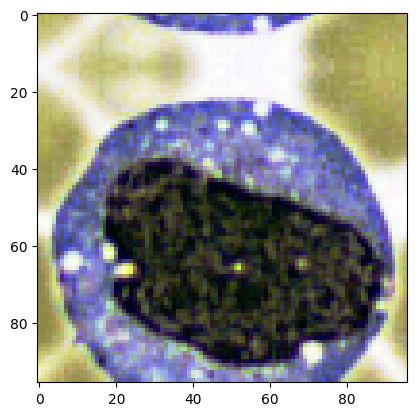

In [ ]:
import matplotlib.pyplot as plt

# We show a random image from the dataset
plt.imshow(X_train[-2] / 255.0)
print('Class', aug_labels[1])

## 🛠️ Train and Save the Model

In [ ]:
class MyModel:
  def __init__(self):
    """
    Initialize the internal state of the model
    """
    self.neural_network = self.create_model()

  # Returns the augmentation layers applied during the training
  def get_augmentation_layer(self):

    return tf.keras.Sequential([
        keras.layers.RandomRotation(0.5, fill_mode='reflect'),

        # Random zoom in height
        keras.layers.RandomZoom(height_factor=(-0.2, 0.7), fill_mode='nearest'),
        keras.layers.RandomZoom(height_factor=(0.0, 0.0), width_factor=(-0.3, 0.3), fill_mode='nearest'),
        keras.layers.RandomFlip(mode="horizontal"),
        keras.layers.RandomFlip(mode="vertical"),
        keras.layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
        keras.layers.RandomBrightness(0.3),
        keras_cv.layers.RandomHue(0.3, [0,255]),
        keras.layers.GaussianNoise(0.05),

        keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
        keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
        keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
        keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
        keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      ])


    def create_model(self):
        """
        Creates and return a model with the requested pretrained model.
        """
        # Define the augmentations layer
        data_augmentation = self.get_augmentation_layer()

        # Use a pretrained network
        model_pretrained = tfk.applications.ConvNeXtXLarge(
          input_shape=(96, 96, 3),
          include_top=False,
          weights='imagenet',
          pooling=None
        )

        self.model_name_pretrained = 'convnext_xlarge'

        print("Current number of layers is:")
        print(len(model_pretrained.layers))

        # Build the model
        inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')
        x = data_augmentation(inputs)
        x = model_pretrained(x)

        x = tfk.layers.Dense(512, activation='relu')(x)
        x = tfk.layers.Dropout(0.3)(x)
        x = tfk.layers.Dense(256, activation='relu')(x)
        x = tfk.layers.Dropout(0.3)(x)
        outputs = tfk.layers.Dense(8, activation='softmax', name='output_layer')(x)

        model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

        return model

    def train_transfer_learning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        """
        Train the model keeping the pretrained layers frozen
        """

        self.neural_network.get_layer(self.model_name_pretrained).trainable = False

        # Set all the pretrained layers as non trainable
        for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
            layer.trainable = False

        # Recompile the model
        self.neural_network.compile(
            loss=tfk.losses.CategoricalCrossentropy(),
            optimizer=tfk.optimizers.Lion(),
            metrics=['accuracy']
        )

        # Callback to sabe a checkpoint every 10 epochs
        save_every_10 = LambdaCallback(
            on_epoch_end=lambda epoch, logs:
            self.neural_network.save(f'XLarge/model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
        )

        # Callback to stop if a certain number of epoch pass without improvements in the val_accuracy
        early_stopping = tfk.callbacks.EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=8,
            restore_best_weights=True
        )

        # Train the model
        history = self.neural_network.fit(
            x=X_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data=(X_test, y_test),
            callbacks=[save_every_10, early_stopping]
        )

    def train_fine_tuning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32, fine_tune_from=50):
        """
        Unlock also the selected pretrained layers and train the model
        """

        self.neural_network.get_layer(self.model_name_pretrained).trainable = True

        # Unlock convolutional layers fron `fine_tune_from` on
        for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
            layer.trainable = False
            if i > fine_tune_from:
              if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
                  layer.trainable = True

        # Compile the model
        self.neural_network.compile(
            loss=tfk.losses.CategoricalCrossentropy(),
            optimizer=tfk.optimizers.Lion(learning_rate=1e-4),
            metrics=['accuracy']
        )

        # Callback to sabe a checkpoint every 10 epochs
        save_every_10 = LambdaCallback(
            on_epoch_end=lambda epoch, logs:
            self.neural_network.save(f'XLarge/model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
        )

        # Callback to stop if a certain number of epoch pass without improvements in the val_accuracy
        early_stopping = tfk.callbacks.EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=8,
            restore_best_weights=True
        )

        # Train the model
        history = self.neural_network.fit(
            x=X_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data=(X_test, y_test),
            callbacks=[save_every_10, early_stopping]
        )

    def test(self, X_test, y_test):
        """
        Valuta il modello sui dati di test X_test e le etichette y_test.
        """
        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
        print(f'Test accuracy: {test_acc}')

    def save(self):
        """
        Salva il modello senza i layer di data augmentation.
        """
        self.neural_network.save('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/XLarge/weights.keras')

    def predict(self, X):
        """
        Predice le etichette corrispondenti all'input X.
        """
        preds = self.neural_network.predict(X)
        preds = np.argmax(preds, axis=1)
        return preds



In [ ]:
model = MyModel()

1393257616/1393257616 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step
number of layers:
260


[0. 0. 0. 0. 0. 1. 0. 0.]


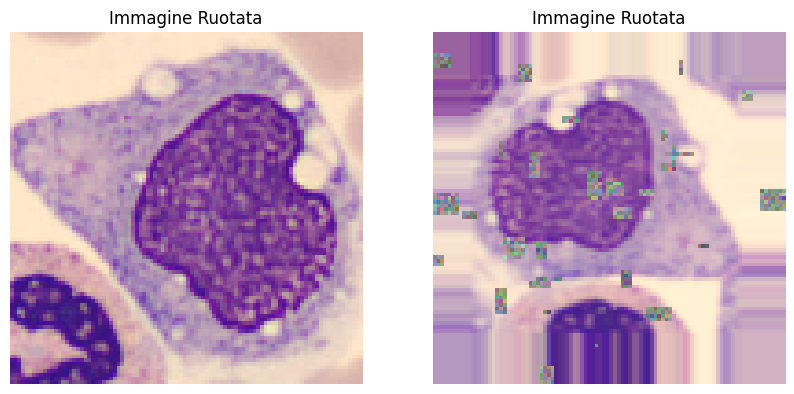

In [ ]:
data_augmentation = model.get_augmentation_layer()

# Applica la rotazione casuale
rotated_image = data_augmentation(X_train[6001])
print(y_train[6001])

# Visualizza l'immagine originale e quella ruotata
plt.figure(figsize=(10, 5))

# Mostra l'immagine ruotata
plt.subplot(1, 2, 1)
plt.imshow(X_train[6001] / 255.0)
plt.title("Immagine Ruotata")
plt.axis('off')

# Mostra l'immagine ruotata
plt.subplot(1, 2, 2)
plt.imshow(rotated_image / 255.0)
plt.title("Immagine Ruotata")
plt.axis('off')

plt.show()

In [ ]:
#model.neural_network.save('weights2.keras')

In [ ]:
#X_test_augmented = model.get_augmentation_layer()(X_test)

In [ ]:
model.train_transfer_learning(X_train, y_train, X_test, y_test, 20, 512)
#model.train_transfer_learning(X_train, y_train, X_test, y_test, 1, 512)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 919s 35s/step - accuracy: 0.3052 - loss: 2.2029 - val_accuracy: 0.6778 - val_loss: 0.9345
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 908s 35s/step - accuracy: 0.6230 - loss: 1.0697 - val_accuracy: 0.8117 - val_loss: 0.5542
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 923s 35s/step - accuracy: 0.7013 - loss: 0.8767 - val_accuracy: 0.8234 - val_loss: 0.4831
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 919s 35s/step - accuracy: 0.7320 - loss: 0.8028 - val_accuracy: 0.8218 - val_loss: 0.5023
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 912s 35s/step - accuracy: 0.7615 - loss: 0.7490 - val_accuracy: 0.8569 - val_loss: 0.4026
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 872s 35s/step - accuracy: 0.7684 - loss: 0.7178 - val_accuracy: 0.8778 - val_loss: 0.3426
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 872s 35s/step - accuracy: 0.7724 - loss: 0.7062 - val_accuracy: 0.8979 - val_loss: 0.3289
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 920s 35s/step - accuracy: 0.7804 - loss: 0.6940 - val_accuracy: 0.

In [ ]:
model.neural_network.save('/gdrive/My Drive/[2024-2025] AN2DL/Homework 1/XLarge/weights.keras')

In [ ]:
model.train_fine_tuning(X_train, y_train, X_test, y_test, 50, 512, 220)
#model.train_fine_tuning(X_train, y_train, X_test, y_test, 1, 512, 220)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1082s 42s/step - accuracy: 0.8015 - loss: 0.6295 - val_accuracy: 0.8904 - val_loss: 0.3208
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1030s 41s/step - accuracy: 0.8044 - loss: 0.6232 - val_accuracy: 0.8879 - val_loss: 0.3124
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1029s 41s/step - accuracy: 0.8131 - loss: 0.5875 - val_accuracy: 0.8971 - val_loss: 0.2863
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1042s 41s/step - accuracy: 0.8222 - loss: 0.5762 - val_accuracy: 0.9013 - val_loss: 0.2897
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1042s 41s/step - accuracy: 0.8211 - loss: 0.5762 - val_accuracy: 0.9054 - val_loss: 0.2913
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1041s 41s/step - accuracy: 0.8288 - loss: 0.5596 - val_accuracy: 0.9029 - val_loss: 0.3108
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1033s 41s/step - accuracy: 0.8313 - loss: 0.5521 - val_accuracy: 0.9130 - val_loss: 0.2846
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1050s 41s/step - accuracy: 0.8284 - loss: 0.5567 - val_accu

In [ ]:
model.neural_network.save('/gdrive/My Drive/[2024-2025] AN2DL/Homework 1/XLarge/weights2.keras')

In [ ]:
#model.test(X_test2, y_test2)

In [ ]:
#preds = model.predict(X_test)

In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = np.argmax(y_test, axis=1)
y_pred = preds
# Genera la confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Visualizza la confusion matrix con le etichette
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
# Usa una mappa di colori blu
plt.title("Confusion Matrix")
plt.show()"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\ny_true = np.argmax(y_test, axis=1)\ny_pred = preds\n# Genera la confusion matrix\ncm = confusion_matrix(y_true, y_pred)\n# Visualizza la confusion matrix con le etichette\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot(cmap=plt.cm.Blues)\n# Usa una mappa di colori blu\nplt.title("Confusion Matrix")\nplt.show()'

In [ ]:
#model.neural_network.save('/gdrive/MyDrive/weights.keras')

## 📊 Prepare Your SubmissionTo prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:```python# file: model.pyclass Model:    def __init__(self):        """Initialize the internal state of the model."""    def predict(self, X):        """Return a numpy array with the labels corresponding to the input X."""```The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
%%writefile '/gdrive/My Drive/[2024-2025] AN2DL/Homework 1/XLarge/model.py'
class Model:
  def __init__(self):        # Carica il modello senza compilazione
    self.neural_network = tfk.models.load_model('weights.keras')

  def test(self, X_test, y_test):
    test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc}')

  def predict(self, X):
    preds = self.neural_network.predict(X)
    if len(preds.shape) == 2:
      preds = np.argmax(preds, axis=1)
      return preds

Overwriting /gdrive/My Drive/[2024-2025] AN2DL/Homework 1/XLarge/model.py


In [ ]:
#model2 = Model2()model2.test(X_test2, y_test2)

In [ ]:
%cd XLarge

from datetime import datetime
filename1 = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}_NOFN.zip'
filename2 = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}_FN.zip'

# Add files to the zip command if needed
!zip {filename1} model.py weights.keras
!zip {filename2} model.py weights2.keras

from google.colab import files
files.download(filename1)
files.download(filename2)

/gdrive/My Drive/[2024-2025] AN2DL/Homework 1/XLarge
  adding: model.py (deflated 42%)
  adding: weights.keras (deflated 7%)
  adding: model.py (deflated 42%)
  adding: weights2.keras (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>